## Fan Power Modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fan_power_data = pd.read_csv("../data/fan_power_data.csv", header=None, names=["speed", "power"])
fan_power_data.head()

,speed,power
0,1788.074978,9.658168
1,1791.671805,10.076887
2,1791.671805,9.242511
3,1797.323961,10.496480
4,1797.323961,10.079292


In [3]:
fan_power_data["speed"] = fan_power_data["speed"].round().astype(int)
fan_power_data = fan_power_data.groupby("speed", as_index=False).mean()

speed_range = np.arange(fan_power_data["speed"].min(), fan_power_data["speed"].max() + 1, 1)
fan_power_data = fan_power_data.set_index("speed").reindex(speed_range).interpolate(method='nearest')

fan_power_data = fan_power_data.reset_index().rename(columns={"index": "speed"})

fan_power_data.head()

,speed,power
0,1788,9.658168
1,1789,9.658168
2,1790,9.658168
3,1791,9.659699
4,1792,9.659699


In [4]:
fan_power_data.shape

(2417, 2)

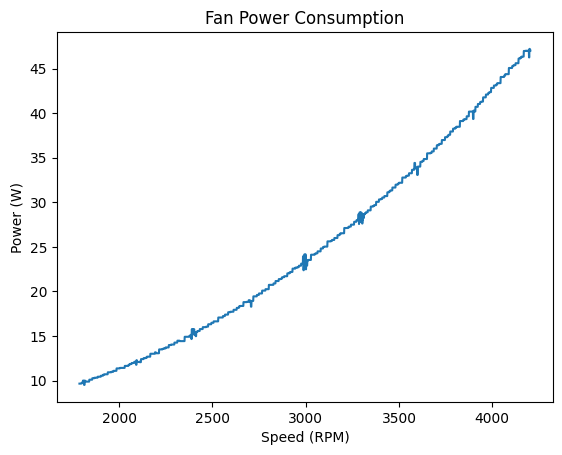

In [5]:
plt.plot(fan_power_data["speed"], fan_power_data["power"])
plt.xlabel("Speed (RPM)")
plt.ylabel("Power (W)")
plt.title("Fan Power Consumption")
plt.show()

In [6]:
from scipy.signal import savgol_filter

fan_power_data["power"] = savgol_filter(fan_power_data["power"], window_length=21, polyorder=3)

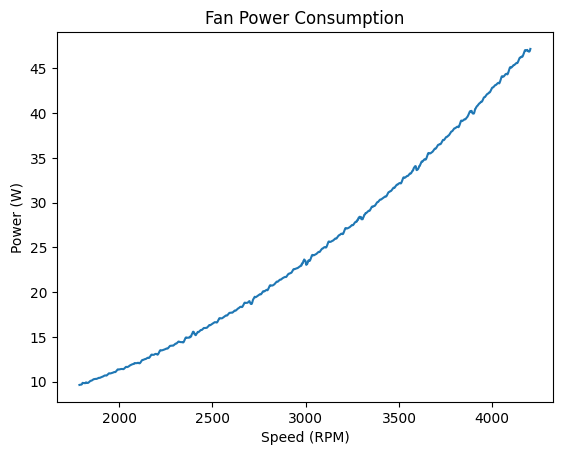

In [7]:
plt.plot(fan_power_data["speed"], fan_power_data["power"])
plt.xlabel("Speed (RPM)")
plt.ylabel("Power (W)")
plt.title("Fan Power Consumption")
plt.show()

In [8]:
# save the data
fan_power_data.to_csv("../data/fan_power_processed.csv", index=False)

## Function fitting - Cubic function

In [9]:
from sklearn.preprocessing import MinMaxScaler

# Extract speed and power columns
x = fan_power_data["speed"].values.reshape(-1, 1)
y = fan_power_data["power"].values

# Normalize speed values to [0, 1]
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x).flatten()  # Normalize speed

# Fit a cubic polynomial to the normalized speed
coeffs = np.polyfit(x_scaled, y, 3)  # Degree 3 polynomial

# Extract coefficients
a, b, c, d = coeffs
print(f"a: {a}, b: {b}, c: {c}, d: {d}")
print(f"Power = {a:.2f} * Speed^3 + {b:.2f} * Speed^2 + {c:.2f} * Speed + {d:.2f}")

a: -0.244662620038491, b: 21.203344894250332, c: 16.8138992038796, d: 9.660080410159196
Power = -0.24 * Speed^3 + 21.20 * Speed^2 + 16.81 * Speed + 9.66


In [10]:
leak_data = pd.read_csv("../data/leakage_power_data.csv", header=None, names=["temperature", "power"])
leak_data.head()

,temperature,power
0,56.561304,9.856281
1,56.652302,10.019932
2,56.743301,10.019932
3,56.834299,10.019932
4,56.925298,10.019932


In [11]:
leak_data["temperature"] = leak_data["temperature"].round().astype(int)
leak_data = leak_data.groupby("temperature", as_index=False).mean()

temperature_range = np.arange(leak_data["temperature"].min(), leak_data["temperature"].max() + 1, 1)
leak_data = leak_data.set_index("temperature").reindex(temperature_range).interpolate(method='nearest')

leak_data = leak_data.reset_index().rename(columns={"index": "temperature"})

leak_data.head()

,temperature,power
0,57,10.117461
1,58,10.615025
2,59,11.092753
3,60,11.709336
4,61,12.284593


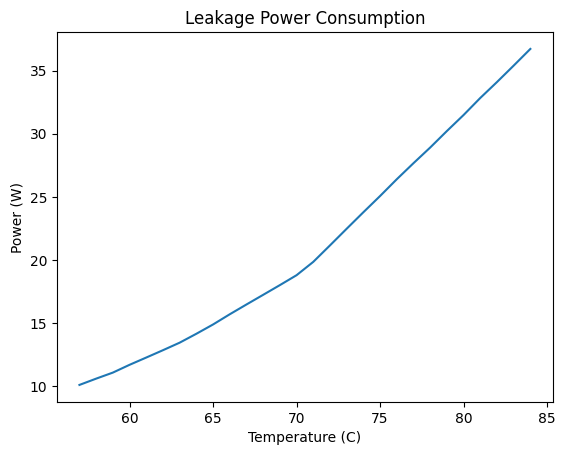

In [12]:
plt.plot(leak_data["temperature"], leak_data["power"])
plt.xlabel("Temperature (C)")
plt.ylabel("Power (W)")
plt.title("Leakage Power Consumption")
plt.show()

c: -4.113586852379731, k1: 13.870635711977917, k2: 1.0964487753461507
Fitted Equation: Power = -4.114 + 13.871 * exp(1.096 * Temperature)


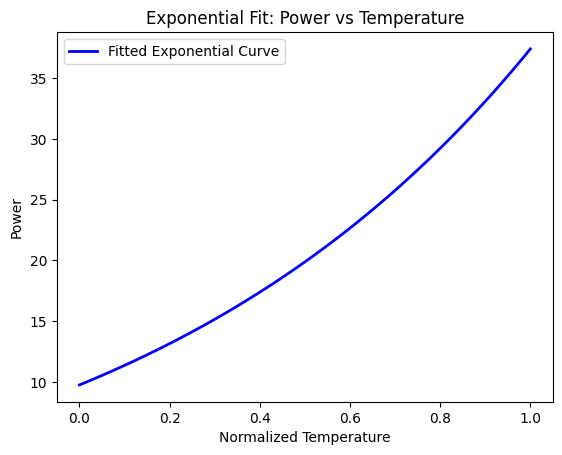

In [15]:
from scipy.optimize import curve_fit

df = leak_data.copy()

# Normalize temperature to [0, 1]
leak_scaler = MinMaxScaler()
df["temperature_scaled"] = leak_scaler.fit_transform(df[["temperature"]])

# Define function to fit: P(T) = c + k1 * exp(k2 * T)
def exp_function(T, c, k1, k2):
    return c + k1 * np.exp(k2 * T)

# Fit the function
popt, _ = curve_fit(exp_function, df["temperature_scaled"], df["power"], p0=[10, 1, 1])

# Extract parameters
c, k1, k2 = popt
print(f"c: {c}, k1: {k1}, k2: {k2}")
print(f"Fitted Equation: Power = {c:.3f} + {k1:.3f} * exp({k2:.3f} * Temperature)")

# Plot Data and Fitted Curve
T_fit = np.linspace(df["temperature_scaled"].min(), df["temperature_scaled"].max(), 100)
P_fit = exp_function(T_fit, *popt)

# plt.scatter(df["temperature_scaled"], df["power"], color='blue', label="Original Data", alpha=0.6)
plt.plot(T_fit, P_fit, color='blue', label="Fitted Exponential Curve", linewidth=2)
plt.xlabel("Normalized Temperature")
plt.ylabel("Power")
plt.title("Exponential Fit: Power vs Temperature")
plt.legend()
plt.show()


In [ ]:
# function that takes temperature as input and returns power
# function that takes fan speed as input and returns power

# compute the total power consumption for a given temperature and fan speed

In [ ]:
# simulation of how temperature of the chip changes over time with change in fan speed